<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22NHL_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#импортируем библиотеки
import requests #для отправки get(post) запросов 
from bs4 import BeautifulSoup #для поиска и выделения необходимых нам данных
import csv #для создания csv-файлов
import pandas as pd #для удобной работы с табличными данными
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

## **<center> Сбор и обработка данных**

### <center> 1. Базовая статистика игроков

Базу данных по статистике игроков взята с сайта "www.hockey-reference.com". Там можно удобно скопировать данные в формате 'txt'.

In [ ]:
data_basic = pd.read_csv('/content/drive/MyDrive/Project_NHL/data/NHL_basic_stat.txt', header=0)

In [ ]:
data_basic.head(3)

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+-,...,S,S%,TOI,ATOI,BLK,HIT,FOW,FOL,FO%,-9999
0,1,Nicholas Abruzzese,22,TOR,C,9,1,0,1,-1,...,8,12.5,92,1013,3,7,2,5,28.6,abruzni01
1,2,Noel Acciari,30,FLA,C,20,3,5,8,2,...,32,9.4,240,1159,16,48,84,82,50.6,acciano01
2,3,Calen Addison,21,MIN,D,15,2,2,4,-4,...,17,11.8,207,1347,6,12,0,0,NaN,addisca01


**Rk**- Ранг **(удаляем)**

**Player** - имя игрока

**Age** - возраст

**Tm** - команда **(удаляем)**

**Pos** - позиция игрока  (левый, правый, центральный нападающий, защитник или вратарь)

**GP** - игр сыграно

**G** - забито шайб

**A** - сделано голевых пасов

**PTS** - сумма забитых шайб и голевых пасов (G+A). **(удаляем)**

**+-** - это разница между шайбами, которые команда забросила и пропустила при нахождении игрока на площадке.

**PIM** - общее время штрафных минут **(удаляем)**

**PIM%** - подсчитаем процент штрафных минут, как отношение общего времени штрафа **PIM** к общему времени на льду **TOI**

**PS** - добытые очки, в пересчете на игрока

Голы, но забитые в:

**EV** - равных составах **(удаляем)**

**PP** - в большинстве **(удаляем)**

сделаем **PP%** из **EV** и **РР** не количество, а процент заброшенных шайб в большинстве к общему количеству

**SH** - в меньшинстве (крайне редкое явление по причине либо везения, либо ошибка противника) **(удаляем)**

**GW** - победные шайбы **(удаляем)**

Голевые передачи, но сделанные в:

**EV.1** - равных составах **(удаляем)**

**PP.1** - в большинстве **(удаляем)**

сделаем **PP.1%** из **EV.1** и **РР.1** не количество, а процент голевых передач в большинстве к общему количеству

**SH.1** - в меньшинстве (крайне редкое явление по причине либо везения, либо ошибка противника) **(удаляем)**
 
**S** - удары в створ

**S%** - процент удачных ударов в створ (забита шайба)

**TOI** - время на льду (общее) **(удаляем)**

**ATOI** - среднее время на льду за игру

**BLK** - заблокированные броски (шайба бьёт очень больно, ценится отвага игроков)

**HIT** - количество силовых приемов 

**FOW** - выйгранные вбрасывания  **(удаляем)**

**FOL** - проигранные вбрасывания **(удаляем)**

**FO%** - процент выйгранных брасываний

**-9999 (player_id)** - id игрока

Создадим новые признаки (см. описание признаков):
       

*   **PIM%**
*   **PP%**
*   **PP.1%**






In [ ]:
data_basic['PIM%'] = round(data_basic['PIM']/data_basic['TOI'] * 100, 1)
data_basic['PP%'] = round(data_basic['PP']/(data_basic['G']) * 100, 1)
data_basic['PP.1%'] = round(data_basic['PP.1']/(data_basic['A']) * 100, 1)

In [ ]:
data_basic[['PP%', 'PIM%', 'PP.1%']].describe()

,PP%,PIM%,PP.1%
count,780.000000,1004.000000,848.000000
mean,12.712179,3.514741,14.567571
std,18.268169,5.210102,18.531037
min,0.000000,0.000000,0.000000
25%,0.000000,1.275000,0.000000
50%,0.000000,2.300000,7.300000
75%,21.700000,3.800000,25.000000
max,100.000000,75.000000,100.000000


In [ ]:
data_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1004 non-null   int64  
 1   Player  1004 non-null   object 
 2   Age     1004 non-null   int64  
 3   Tm      1004 non-null   object 
 4   Pos     1004 non-null   object 
 5   GP      1004 non-null   int64  
 6   G       1004 non-null   int64  
 7   A       1004 non-null   int64  
 8   PTS     1004 non-null   int64  
 9   +-      1004 non-null   int64  
 10  PIM     1004 non-null   int64  
 11  PS      1004 non-null   float64
 12  EV      1004 non-null   int64  
 13  PP      1004 non-null   int64  
 14  SH      1004 non-null   int64  
 15  GW      1004 non-null   int64  
 16  EV.1    1004 non-null   int64  
 17  PP.1    1004 non-null   int64  
 18  SH.1    1004 non-null   int64  
 19  S       1004 non-null   int64  
 20  S%      976 non-null    float64
 21  TOI     1004 non-null   int64  
 22  

Есть пропущенные значения в признаках процент удачных бросков и процент выйгранных вбарасываний.

Но логически проанализировав эти пропуски и формулу расчета, получаем что когда у игрока в расчетах процентов стоят нули, то ошибка деления на ноль тут дает пропуски. Заполним все пропуски нулевыми значениями.

In [ ]:
data_basic.fillna(0, inplace=True)
print(f'Общее количество пропусков после заполнения равно {data_basic.isna().sum().sum()}')

Общее количество пропусков после заполнения равно 0


Удалим признаки, которые считаем излишними (см. описание признаков).

In [ ]:
drop_list = ['Rk', 'Tm', 'PTS', 'PIM', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'TOI', 'FOW', 'FOL']
data_basic.drop(columns=drop_list, axis=1, inplace=True)
print(data_basic.shape)

#переименуем признак '-9999' в 'player_id'
data_basic.rename(columns={'-9999':'player_id'}, inplace=True)

(1004, 18)


Пока оставим данные с базовой статистикой игроков и обратимся к данными с продвинутой статистикой.

### <center> 2. Продвинутая статистика игроков

Базу данных по статистике игроков взята с сайта "www.hockey-reference.com". Там можно удобно скопировать данные в формате 'txt'.

In [ ]:
data_advanced = pd.read_csv('/content/drive/MyDrive/Project_NHL/data/NHL_advanced_stat.txt', header=0)

In [ ]:
data_advanced.head(3)

,Rk,Player,Age,Tm,Pos,GP,CF,CA,CF%,CF% rel,...,oZS%,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%,-9999
0,1,Nicholas Abruzzese,22,TOR,C,9,69,72,48.9,-2.8,...,46.3,53.7,10:13,9:11,0,3,0.2,12,66.7,abruzni01
1,2,Noel Acciari,30,FLA,C,20,204,165,55.3,-1.5,...,52.0,48.0,11:59,10:38,8,6,2.7,52,61.5,acciano01
2,3,Calen Addison,21,MIN,D,15,199,150,57.0,6.3,...,50.5,49.5,13:47,12:16,0,1,3.0,36,47.2,addisca01


**Rк** -Ранг **(удаляем)**

**Age** - возраст **(удаляем)**

**GP** - Сыгранные игры **(удаляем)**

**Tm** - название команды **(удаляем)**

**Pos** - позиция игрока (левый, правый, центральный нападающий, защитник или вратарь) **(удаляем)**

Расширенная или продвинутая статистика, очень быстро стала незаменимым инструментом анализа матчей в НХЛ. Менеджеры и тренеры команд используют ее для оценки игровых качеств хоккеистов при заключении контрактов:



1.   **Corsi**

Одним из самых популярных показателей расширенной статистики является, так называемый Corsi (название произошло от фамилии тренера занимавшегося подготовкой вратарей в Баффало Сэйбрз Дж. Корси, который первым стал применять этот показатель в своей работе.) Что же такое Корси, он очень напоминает известный многим показатель полезности плюс-минус, но для расчета берутся не забитые и пропущенные голы, а броски, причем абсолютно все, то есть попадания в створ, броски мимо и даже заблокированные

> **CF (Corsi-For)** -все броски нанесённые командой. Если Корси рассчитывается для хоккеиста, учитываются только броски данного игрока. Применяется для анализа атакующих действий.

> **CA (Corsi-Against)** -все броски, которые нанесла команда соперника. Показатель помогает оценить оборонительные действия.

> **CF%** - процент CF от CF+CA. Помогает оценить игровой стиль команды, атакующий или оборонительный. Значение больше 50% показывает, что команда предпочитает атаку обороне.

> **CF% rel%** (Relative Corsi, Относительный Corsi) - выражен разностью Corsi On и Corsi Off. Является способом измерения эффективности владения шайбой игрока, относительно остальной команды.**Corsi On** - баланс Corsi, производимый командой за 60 минут игрового времени, когда конкретный игрок (для которого производится расчёт) находится на поле.
**Corsi Off** - в противовес Corsi On отражает среднее значение Corsi, производимое командой за 60 минут, когда заданного игрока нет на поле.




2.   **Fenwick**

Вместо Corsi в любом месте можно точно так же рассматривать Fenwick (показатели FF, FA, FF60, FA60, FF%). Данный вид статистики отличается лишь тем, что не учитывает заблокированные броски. При сравнении команд предпочтительней использовать именно этот показатель, а ***для игроков логичней использовать Corsi. Поэтому удаляем данные показатели.***




3.   **PDO**

PDO (индивидуальный или командный) — «сумма процентов, реализованных командой», состоит из суммы процента отраженных бросков и процента реализованных бросков, когда игрок находится на льду

> **oiSH%** - Процент командных бросков на льду
бросков, пока этот игрок/команда находились на льду

> **oiSV%** - процент сейвов команды на льду
сохранения, пока этот игрок/команда находились на льду 

> **PDO** - сумма oiSH% + oiSV% **(удаляем)**


4.   **Зона старта**
Процент выхода игрока на вбрасывание в зоне соперника. Подразумевается не выход на саму точку вбрасывания, а лишь выход на смену, когда назначено вбрасывание в зоне нападения.


> **oZS%** - Процент выхода игрока на вбрасывание в зоне соперника.

> **dZS%** - Процент выхода игрока на вбрасывание в своей зоне 


**TOI/60** - Время на льду за 60 минут во всех ситуациях **(удаляем,тк повторяющийся признак)**

**TOI(EV)** -Время на льду только при равных составах за 60 минут **(удаляем,тк повторяющийся признак)**

**ТК** -- Отборы шайбы

**GV** -- Потери шайбы

**E+/-** -  +/- с учетом того, откуда были нанесены удары, пока этот игрок находился на льду в равных составах. **(удаляем)** 

**SAтт.** - Общее количество выстрелов во всех ситуациях **(удаляем,тк повторяющийся признак)**.

**Thru%** - Процент сделанных точных бросков, попадающих в сетку. **(удаляем,тк повторяющийся признак)**

**-9999 (player_id)** - id игрока


Удалим признаки, которые считаем излишними (см. описание признаков).

In [ ]:
drop_list = ['Rk', 'Age', 'Pos', 'GP', 'FF', 'FA', 'FF%', 'FF% rel',
             'PDO', 'TOI/60', 'TOI(EV)', 'E+/-', 'SAtt.', 'Thru%']
data_advanced.drop(columns=drop_list, axis=1, inplace=True)

#переименуем признак '-9999' в 'player_id'
data_advanced.rename(columns={'-9999':'player_id'}, inplace=True)

print(data_advanced.shape)

(1162, 13)


В продвинутой статистике 1162 игрока, а в базовой всего 1004. Давайте разбираться...

In [ ]:
#Поищем дубликаты игроков по именам 
data_advanced.iloc[20:30, :]

,Player,Tm,CF,CA,CF%,CF% rel,oiSH%,oiSV%,oZS%,dZS%,TK,GV,player_id
20,Mason Appleton,TOT,803,818,49.5,0.2,9.0,91.4,37.0,63.0,15,13,applema01
21,Mason Appleton,SEA,559,568,49.6,-0.3,9.9,89.0,36.8,63.2,8,7,applema01
22,Mason Appleton,WPG,244,250,49.4,1.4,6.8,96.0,37.7,62.3,7,6,applema01
23,Josh Archibald,EDM,35,54,39.3,-14.1,13.3,87.5,45.9,54.1,3,1,archijo01
24,Joel Armia,MTL,606,637,48.8,1.3,6.1,90.7,49.4,50.6,30,28,armiajo01
25,Viktor Arvidsson,LAK,1071,833,56.3,2.3,8.6,89.2,53.7,46.3,24,16,arvidvi01
26,Rasmus Asplund,BUF,873,781,52.8,5.7,7.8,89.8,51.2,48.8,21,23,asplura01
27,Zach Aston-Reese,TOT,632,683,48.1,-2.4,8.2,94.0,33.4,66.6,19,10,astonza01
28,Zach Aston-Reese,PIT,476,490,49.3,-3.2,7.9,94.4,32.1,67.9,13,7,astonza01
29,Zach Aston-Reese,ANA,156,193,44.7,0.4,9.2,92.9,37.0,63.0,6,3,astonza01


Видно, что в статистике есть у одного игрока выведены несколько строк данных (в среднем по 3). Это означает, что игрок переходил из одной команды в другую, а самая первая строка как раз имеет итоговую статистику по всему сезону. 

Поэтому удалим дубликаты имен игроков, оставив первую строчку. 

Но есть одно "НО", в НХЛ оказывается играют 2 игрока с одинаковыми именем и фамилией, поэтому пойдем искать дубликаты по 'player_id'.

In [ ]:
print(f'Количество строк до удаления дубликатов имен {data_advanced.shape[0]}')
data_advanced.drop_duplicates(subset='player_id', keep='first', inplace=True)
print(f'Количество строк после удаления дубликатов имен {data_advanced.shape[0]}')

Количество строк до удаления дубликатов имен 1162
Количество строк после удаления дубликатов имен 1004


Отлично, количество игроков в базовой и продвинутой базах одинаково, чтобы без проблем их объединить.

Осталось только удалить повторный признак "Tm" (команда игрока), 'Player' (само имя игрока) и заполнить пропуски нулевыми значениями.

In [ ]:
#удалим лишние признаки
data_advanced.drop(columns=['Tm', 'Player'], axis=1, inplace=True)

#посмотрим на пропуски 
print(data_advanced.isna().sum()) 

CF           0
CA           0
CF%          0
CF% rel      0
oiSH%        2
oiSV%        0
oZS%         3
dZS%         3
TK           0
GV           0
player_id    0
dtype: int64


In [ ]:
#Опять пустые данные с процентами, просто заполним их нулями
data_advanced.fillna(0, inplace=True)
print(f'Оставшееся количество пропусков в данных равно {data_advanced.isna().sum().sum()}')

Оставшееся количество пропусков в данных равно 0


### <center> 3. Данные с зарплатами игроков. Часть 1.

Базу данных по зарплате игроков взята с сайта "www.hockey-reference.com". 
Однако, уже удобного для нас формата "txt" там нет, поэтому при помощи парсинга загрузим данные с сайта

In [ ]:
#создаем переменные с адресом сайта и загаловки GET-запросов
url = 'https://www.hockey-reference.com/friv/current_nhl_salaries.cgi'

headers = {
    'accept': '*/*',
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

In [ ]:
#Отправим запрос по нужному url и сохраним текст страницы в переменную 'src'
req = requests.get(url, headers=headers) 
src = req.text

Чтобы не засорять сайт постоянными запросами, просто скачаем код страницы и запишем в файл "salary"

In [ ]:
with open('/content/drive/MyDrive/Project_NHL/salary.html', 'w') as file:
  file.write(src)

In [ ]:
with open('/content/drive/MyDrive/Project_NHL/salary.html') as file:
  src = file.read()

In [ ]:
soup = BeautifulSoup(src, 'lxml')

salary_head = soup.find(class_='suppress_all sortable stats_table').find('tr').find_all('th') 

In [ ]:
player = salary_head[0].text
cap_hit = salary_head[3].text
player_id = 'player_id'

In [ ]:
with open('/content/drive/MyDrive/Project_NHL/salary.csv', 'w', encoding='utf-8') as file:
  writer = csv.writer(file)
  writer.writerow(
      (
      player,
      cap_hit,
       player_id
       )
  )

In [ ]:
#Проверим, что все запросы выдают нам нужную инфомацию
salary_data = soup.find(class_='suppress_all sortable stats_table').find('tbody').find_all('tr')

a = salary_data[0].find('th').get('data-append-csv')
b = salary_data[0].find('th').text
c = salary_data[0].find_all('td')[2].text
print(a)
print(b)
print(c)

nurseda01
Darnell Nurse
9,250,000


Отлично, с 1001-ой попытки получилось вытащить необходимые нам данные. Запускаем в цикле выгрузку данных и сразу перезаписываем нашу базу данных

In [ ]:
#загружаем необходимый нам список
salary_data = soup.find(class_='suppress_all sortable stats_table').find('tbody').find_all('tr')

#проходим в цикле по каждому элементу списка, выделяем нужную нам информацию и записываем в файл
for row in salary_data:
  data = row.find_all('td')
  
  player =row.find('th').text
  cap_hit = row.find_all('td')[2].text
  player_id = row.find('th').get('data-append-csv')
  
  with open('/content/drive/MyDrive/Project_NHL/salary.csv', 'a', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(
        (
        player,
        cap_hit,
         player_id
        )
  )

In [ ]:
#Проверим собранный датасет
salary_data = pd.read_csv('/content/drive/MyDrive/Project_NHL/salary.csv')

In [ ]:
salary_data.tail(7)


,Player,Cap Hit,player_id
695,Marc Staal,"750,000",staalma01
696,"Okhotiuk, Nikita","789,167",NaN
697,"Olofsson, Fredrik","750,000",NaN
698,"Jonsson-Fjällby, Axel","750,000",NaN
699,"Paul, Nicholas","3,150,000",NaN
700,"Perbix, Nick","842,500",NaN
701,"Greer, AJ","762,500",NaN


Так,с пропуски в "player_id" и кое-где имя и фамилия поменялись местами

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     702 non-null    object
 1   Cap Hit    702 non-null    object
 2   player_id  680 non-null    object
dtypes: object(3)
memory usage: 16.6+ KB


In [ ]:
print(f'Найдены пропуски в количестве {salary_data.isna().sum().sum()} строк и это лишь {salary_data.isna().sum().sum()/salary_data.shape[0]*100:.1f}% от общих данных')

Найдены пропуски в количестве 22 строк и это лишь 3.1% от общих данных


Данных и так не много, попробуем восстановить неправильно написанные имена и вставить пропущенные значения 'id'

In [ ]:
def normalize_player_name(name):
  "Восстановление строки с именем, сначала имя потом фамилия"
  if ',' in str(name):
    name = name.replace(",", "").split()[::-1]
    name = " ".join(name)
    return name
  else:
    return name

In [ ]:
salary_data['Player'] = salary_data['Player'].apply(normalize_player_name)

In [ ]:
#Теперь по несложному алгоритму присвоим пропущенным ID значения,
#состоящие из пяти букв фамилии, двух букв имени и цифрами 01
salary_data['player_id'] = salary_data['player_id'].fillna('Empty')

for i in range(salary_data.shape[0]):
  if salary_data['player_id'][i] == 'Empty':
    id = salary_data['Player'][i].lower().split()
    id = id[1][:5] + id[0][:2] + '01'
    salary_data['player_id'][i] = id

In [ ]:
#Сразу преобразуем признак "Cap Hit" в числовой тип данных
salary_data['Cap Hit'] = salary_data['Cap Hit'].apply(lambda x: int(x.replace(',', '')))

#переименуем признак, чтобы убрать пробелы 
salary_data.rename(columns={'Cap Hit':'cap_hit'}, inplace=True)

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     702 non-null    object
 1   cap_hit    702 non-null    int64 
 2   player_id  702 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.6+ KB


In [ ]:
#сохраним датафрейм
salary_data.to_csv('/content/drive/MyDrive/Project_NHL/salary.csv', index=False)

Всего в таблице оказалось 702 игроков, а в данных о статистике 1004 игрока. Потеряно 30% информации. 

Поищем в других источниках более полную информацию.

### <center> 4. Данные с зарплатами игроков. Часть 2.

Нашелся сайт 'www.capfriendly.com' в котором есть информация о зарплатах 1563 игроков, что в 2 раза больше, чем в предыдущем источнике. 

Начнем парсить его.

In [ ]:
#создаем переменные с адресом сайта и загаловки GET-запросов
url = 'https://www.capfriendly.com/browse/active?stats-season=2023&hide=team,clauses,age,position,handed,expiry-status,salary,skater-stats,goalie-stats'

headers = {
    'accept': '*/*',
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

In [ ]:
req = requests.get(url, headers=headers) 
src = req.text

In [ ]:
#Загрузим данные с заголовками таблицы
soup = BeautifulSoup(src, 'lxml')

salary_head = soup.find(class_='column_head').find_all('th') 

player = salary_head[0].text
cap_hit = salary_head[1].text
player_id = 'player_id'


#сразу же запишем этот заголовок в наш новый csv-файл
with open('/content/drive/MyDrive/Project_NHL/caphit.csv', 'w', encoding='utf-8') as file:
  writer = csv.writer(file)
  writer.writerow(
      (
      player,
      cap_hit,
       player_id
       )
  )

In [ ]:
#Найдем необходимые нам параметры из таблицы, преобразуем их.
salary_data = soup.find(class_='tbl sortable').find('tbody').find_all('tr')

player = salary_data[0].find('a').text
cap_hit = int(salary_data[0].find(class_='center').text.strip('$').replace(',', ''))
id = salary_data[0].find('a').text.lower().split()
id = id[1][:5] + id[0][:2] + '01'
print(player)
print(cap_hit)
print(id)

Connor McDavid
12500000
mcdavco01


Отлично, уже с 10-ой попытки мы достали необходимые нам данные. 

Запустим в цикле загрузку данных и сразу же запишем их в наш файл

In [ ]:
salary_data = soup.find(class_='tbl sortable').find('tbody').find_all('tr')

for row in salary_data:
  player = row.find('a').text
  cap_hit = int(row.find(class_='center').text.strip('$').replace(',', ''))
  player_id = row.find('a').text.lower().split()
  player_id = player_id[1][:5] + player_id[0][:2] + '01'
  
  with open('/content/drive/MyDrive/Project_NHL/caphit.csv', 'a', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(
        (
        player,
        cap_hit,
         player_id
        )
  )

На сайте вся таблица не помещается, поэтому пройдем циклом по всем 32-м страницам с табличными данными и запишем в файл.

In [ ]:
for page in range(2, 33):
  time.sleep(2)  #пауза 2 секунды для подгрузки данных
  url = f'https://www.capfriendly.com/browse/active?stats-season=2023&hide=team,clauses,age,position,handed,expiry-status,salary,skater-stats,goalie-stats&pg={page}' 
  req = requests.get(url, headers=headers)
  src = req.text

  soup = BeautifulSoup(src, 'lxml')
  
  salary_data = soup.find(class_='tbl sortable').find('tbody').find_all('tr')

  for row in salary_data:
    player = row.find('a').text
    cap_hit = int(row.find(class_='center').text.strip('$').replace(',', ''))
    player_id = row.find('a').text.lower().split()
    player_id = player_id[1][:5] + player_id[0][:2] + '01'
  
    with open('/content/drive/MyDrive/Project_NHL/caphit.csv', 'a', encoding='utf-8') as file:
      writer = csv.writer(file)
      writer.writerow(
          (
        player,
        cap_hit,
         player_id
          )
    )

  

Отлично, данные получены.

Отступление. Смотря на код, сколько по времени он создавался, сколько всего "гуглилось", каждая запятая в нем просто вымучена долгими пробами и страданиями, желанием бросить это все и просто взять готовый датасет на другую тему, я безумно горжусь проделанной работой. 

Продолжим

In [ ]:
#Проверим собранный датасет
caphit_df = pd.read_csv('/content/drive/MyDrive/Project_NHL/caphit.csv')
caphit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PLAYER     1563 non-null   object
 1   CAP HIT    1563 non-null   int64 
 2   player_id  1563 non-null   object
dtypes: int64(1), object(2)
memory usage: 36.8+ KB


In [ ]:
#Поищем дубликаты
print(f'всего дубликатов {caphit_df.duplicated().sum()}')

#Удалим полные дубликаты в данных
caphit_df.drop_duplicates(inplace=True)

#Поищем дубликаты в признаке 'player_id'
print(f'всего дубликатов {caphit_df["player_id"].duplicated().sum()}')

всего дубликатов 27
всего дубликатов 8


In [ ]:
#Выведем эти повторения
caphit_df[caphit_df['player_id'].duplicated(keep=False) ==True]

,PLAYER,CAP HIT,player_id
42,Sebastian Aho,8460250,ahose01
77,Anders Lee,7000000,leean01
105,Matt Murray,6250000,murrama01
157,Josh Anderson,5500000,anderjo01
424,Martin Jones,2000000,jonesma01
503,Max Jones,1295000,jonesma01
516,Colin White,1200000,whiteco01
737,Andre Lee,883750,leean01
1042,Sebastian Aho,825000,ahose01
1254,Colton White,762500,whiteco01


In [ ]:
#Присвоим индекс 02 в id тем, кто зарабатывает меньше
caphit_df['player_id'][1042] = 'ahose02'
caphit_df['player_id'][1454] = 'anderjo02'
caphit_df['player_id'][737] = 'leean02'
caphit_df['player_id'][503] = 'jonesma02'
caphit_df['player_id'][1254] = 'whiteco02'
caphit_df['player_id'][1300] = 'megnaja02'
caphit_df['player_id'][1527] = 'murrama02'
caphit_df['player_id'][1530] = 'fitzgca02'

In [ ]:
#Сохраним собранный датасет
caphit_df.to_csv('/content/drive/MyDrive/Project_NHL/caphit.csv', index=False)
#caphit_df = pd.read_csv('/content/drive/MyDrive/Project_NHL/caphit.csv')

In [ ]:
#caphit_df = pd.read_csv('/content/drive/MyDrive/Project_NHL/caphit.csv')
#caphit_df

### <center> 5. Объединение данных в одну таблицу

In [ ]:
print(f'Количество игроков в базе основной статистики {data_basic.shape[0]}')
print(f'Количество игроков в базе продвинутой статистики {data_advanced.shape[0]}')
print(f'Количество игроков в первой базе с зарплатами {salary_data.shape[0]}')
print(f'Количество игроков в второй базе с зарплатами {caphit_df.shape[0]}')

Количество игроков в базе основной статистики 1004
Количество игроков в базе продвинутой статистики 1004
Количество игроков в первой базе с зарплатами 702
Количество игроков в второй базе с зарплатами 1536


Данных не то чтобы мало, но берет сомнение, что моделям может быть недостаточно. Данные взяты за последний год, если будет недостаточно, то соберем статистику за 3-5 последних лет. 

Объединим данные по статистике игроков

In [ ]:
stat_df = data_basic.merge(data_advanced, on='player_id', how='outer')

In [ ]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     1004 non-null   object 
 1   Age        1004 non-null   int64  
 2   Pos        1004 non-null   object 
 3   GP         1004 non-null   int64  
 4   G          1004 non-null   int64  
 5   A          1004 non-null   int64  
 6   +-         1004 non-null   int64  
 7   PS         1004 non-null   float64
 8   S          1004 non-null   int64  
 9   S%         1004 non-null   float64
 10  ATOI       1004 non-null   int64  
 11  BLK        1004 non-null   int64  
 12  HIT        1004 non-null   int64  
 13  FO%        1004 non-null   float64
 14  player_id  1004 non-null   object 
 15  PIM%       1004 non-null   float64
 16  PP%        1004 non-null   float64
 17  PP.1%      1004 non-null   float64
 18  CF         1004 non-null   int64  
 19  CA         1004 non-null   int64  
 20  CF%     

добавим данные по зарплатам

In [ ]:
df = stat_df.merge(salary_data, on='player_id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1003
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player_x   1004 non-null   object 
 1   Age        1004 non-null   int64  
 2   Pos        1004 non-null   object 
 3   GP         1004 non-null   int64  
 4   G          1004 non-null   int64  
 5   A          1004 non-null   int64  
 6   +-         1004 non-null   int64  
 7   PS         1004 non-null   float64
 8   S          1004 non-null   int64  
 9   S%         1004 non-null   float64
 10  ATOI       1004 non-null   int64  
 11  BLK        1004 non-null   int64  
 12  HIT        1004 non-null   int64  
 13  FO%        1004 non-null   float64
 14  player_id  1004 non-null   object 
 15  PIM%       1004 non-null   float64
 16  PP%        1004 non-null   float64
 17  PP.1%      1004 non-null   float64
 18  CF         1004 non-null   int64  
 19  CA         1004 non-null   int64  
 20  CF%     

Около 40% пропусков. 

Оставим в датасете 'df' только полностью заполненые строки, а данные с пропусками заполним из второй базы с зарплатами

In [ ]:
#выделим в отдельную базу игроков с пропусками по зарплате. 
temp_df_1 = df[df['cap_hit'].isna()==True]
temp_df_1.dropna(axis=1, inplace=True)
print(f'незаполненых строк в базе {temp_df_1.shape}')

незаполненых строк в базе (391, 28)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#удалим строки с пропусками
df = df[df['cap_hit'].notna()]
print(f'полностью заполненых строк в базе {df.shape[0]}')

полностью заполненых строк в базе 613


In [ ]:
#объединяем по признаку имени игрока "player"
#сначала приведем признак "player" к одинаковому названию
caphit_df.rename(columns={'PLAYER' : 'Player_x'}, inplace=True)
temp_df_2 = temp_df_1.merge(caphit_df, on='Player_x', how='left')
print(f'незаполненых строк в базе {temp_df_2[temp_df_2["CAP HIT"].isna()==True].shape[0]}')

незаполненых строк в базе 123


из 391 пропуска мы заполнили 268!!!

Данные с полностью заполнеными игроками мы соединим, а с пропусками выделим в отдельно.

In [ ]:
#выделим в отдельную базу игроков с пропусками по зарплате. 
temp_df_3 = temp_df_2[temp_df_2["CAP HIT"].isna()==True]
temp_df_3.dropna(axis=1, inplace=True)
print(f'незаполненых строк в базе {temp_df_3.shape[0]}')

незаполненых строк в базе 123


In [ ]:
#выделим заполненые строки и приведем признаки к одному названию
df_1 = temp_df_2[temp_df_2["CAP HIT"].notna()]

df_1.rename(columns={'player_id_x' : 'player_id', 'CAP HIT' : 'cap_hit'}, inplace=True)

#удалим лишние признаки
df_1.drop('player_id_y', axis=1, inplace=True)
df.drop('Player_y', axis=1, inplace=True)

#соединим данные без пропусков
df = pd.concat([df, df_1])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 1 to 390
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player_x   881 non-null    object 
 1   Age        881 non-null    int64  
 2   Pos        881 non-null    object 
 3   GP         881 non-null    int64  
 4   G          881 non-null    int64  
 5   A          881 non-null    int64  
 6   +-         881 non-null    int64  
 7   PS         881 non-null    float64
 8   S          881 non-null    int64  
 9   S%         881 non-null    float64
 10  ATOI       881 non-null    int64  
 11  BLK        881 non-null    int64  
 12  HIT        881 non-null    int64  
 13  FO%        881 non-null    float64
 14  player_id  881 non-null    object 
 15  PIM%       881 non-null    float64
 16  PP%        881 non-null    float64
 17  PP.1%      881 non-null    float64
 18  CF         881 non-null    int64  
 19  CA         881 non-null    int64  
 20  CF%       

Уже 881 игрок имеют полную статистику!!!

In [ ]:
#объединяем по признаку имени игрока "player"
#сначала приведем признак "player" к одинковому названию
caphit_df.rename(columns={'PLAYER' : 'Player_x'}, inplace=True)
temp_df_2 = temp_df_1.merge(caphit_df, on='player_id', how='left')
print(f'незаполненых строк в базе {temp_df_2[temp_df_2["CAP HIT"].isna()==True].shape[0]}')

незаполненых строк в базе 122


In [ ]:
print(f'незаполненых строк в базе было {temp_df_3.shape[0]}')

#сначала приведем признак "player" к одинковому названию
temp_df_3.rename(columns={'player_id_x' : 'player_id'}, inplace=True)

#объединяем по признаку имени игрока "player_id"
temp_df_4 = temp_df_3.merge(caphit_df, on='player_id', how='left')

print(f'незаполненых строк в базе осталось {temp_df_4[temp_df_4["CAP HIT"].isna()==True].shape[0]}')

незаполненых строк в базе было 123
незаполненых строк в базе осталось 104


104 игрока так и остались "без зарплаты". Это 10% от наших данных. Придется их удалить.

Соединим заполненые данные игроков с нашей базой "df".

In [ ]:
#выделим заполненые строки и приведем признаки к одному названию
df_2 = temp_df_4[temp_df_4["CAP HIT"].notna()]

df_2.rename(columns={'Player_x_x' : 'Player_x', 'CAP HIT' : 'cap_hit'}, inplace=True)

#удалим лишние признаки
df_2.drop('Player_x_y', axis=1, inplace=True)

#соединим данные без пропусков
df = pd.concat([df, df_2])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 1 to 121
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player_x   900 non-null    object 
 1   Age        900 non-null    int64  
 2   Pos        900 non-null    object 
 3   GP         900 non-null    int64  
 4   G          900 non-null    int64  
 5   A          900 non-null    int64  
 6   +-         900 non-null    int64  
 7   PS         900 non-null    float64
 8   S          900 non-null    int64  
 9   S%         900 non-null    float64
 10  ATOI       900 non-null    int64  
 11  BLK        900 non-null    int64  
 12  HIT        900 non-null    int64  
 13  FO%        900 non-null    float64
 14  player_id  900 non-null    object 
 15  PIM%       900 non-null    float64
 16  PP%        900 non-null    float64
 17  PP.1%      900 non-null    float64
 18  CF         900 non-null    int64  
 19  CA         900 non-null    int64  
 20  CF%       

In [ ]:
#сохраним наш датафрейм
df.to_csv('/content/drive/MyDrive/Project_NHL/mergered_data.csv', index=False)
#df = pd.read_csv('/content/drive/MyDrive/Project_NHL/mergered_data.csv')

Подичили базу данных за прошедший сезон с 900 игроками. 

Пора провести предварительный анализ данных ("EDA")

## **<center> Exploratory data analysis (EDA). Разведовательный анализ данных**

In [ ]:
#создадим копию датафрейма
nhl_df = df.copy()

### <center> 1. Очистка данных

Удалим игроков, которые играли меньше 10% игр или выходили на лед в среднем меньше 6 минут (10% игрового времени)

In [ ]:
nhl_df = nhl_df[(nhl_df['GP'] > 8) & (nhl_df['ATOI'] > 300)]
print(f'После удаления малоиграющих осталось ровно {nhl_df.shape[0]} игрока(ов)')

После удаления малоиграющих осталось ровно 757 игрока(ов)


А еще у новички (молодых игроков моложе 20 лет) обязаны заключать свой первый контракт на срок 3 года с минимальной зарплатой 925 000 долларов. 

Давайте найдем таких игроков

In [ ]:
nhl_df[(nhl_df['Age'] < 21) &  (nhl_df['cap_hit'] < 926000)]

,Player_x,Age,Pos,GP,G,A,+-,PS,S,S%,...,CA,CF%,CF% rel,oiSH%,oiSV%,oZS%,dZS%,TK,GV,cap_hit
35,Matthew Beniers,19,C,10,3,6,-1,0.9,18,16.7,...,123,47.0,-7.3,11.7,86.4,63.1,36.9,6,5,897500.0
49,Matt Boldy,20,LW,47,15,24,17,4.3,113,13.3,...,562,51.4,-0.4,12.9,91.1,55.1,44.9,27,22,880833.0
61,Philip Broberg,20,D,23,1,2,-8,0.0,29,3.4,...,222,52.2,1.3,7.2,86.6,48.6,51.4,5,14,863333.0
73,Quinton Byfield,19,C,40,5,5,-7,0.5,39,12.8,...,380,49.9,-5.6,6.6,91.2,60.9,39.1,15,14,894167.0
107,Dylan Cozens,20,C,79,13,25,-19,2.4,160,8.1,...,942,50.1,1.9,7.9,89.3,57.6,42.4,33,30,894167.0
235,Ville Heinola,20,D,12,0,5,-2,0.5,25,0.0,...,153,48.5,-2.2,8.5,90.3,52.1,47.9,5,5,863333.0
246,Alexander Holtz,20,RW,9,0,2,-5,-0.2,12,0.0,...,102,38.2,-11.7,6.3,87.7,47.6,52.4,5,1,894167.0
261,Seth Jarvis,19,C,68,17,23,11,4.3,110,15.5,...,708,55.0,-1.3,10.1,90.7,61.7,38.3,15,33,894167.0
268,Kent Johnson,19,C,9,0,3,2,0.2,5,0.0,...,78,56.7,6.6,8.0,95.2,57.5,42.5,2,2,925000.0
320,Alexis Lafreniere,20,LW,79,19,12,2,3.2,110,17.3,...,903,48.2,1.0,9.1,92.3,56.5,43.5,44,28,925000.0


Несколько ребят провели много игр, много забивали и ассистировали, но по правилам лиги не могли получить достойный контракт. Они нам будут только мешать и путать модель. Удалим этих игроков из данных.

In [ ]:
nhl_df = nhl_df[(nhl_df['Age'] > 20) |  (nhl_df['cap_hit'] > 926000)]
print(f'После удаления игроков с "контрактами новичка" осталось ровно {nhl_df.shape[0]} игрока(ов)')

После удаления игроков с "контрактами новичка" осталось ровно 722 игрока(ов)


### <center> 2. Целевой признак

In [ ]:
#посмотрим как распределяется уровень зарплаты среди игроков
px.histogram(
    nhl_df['cap_hit'],
    title='распределение зарплат',
    width=1000,
    height=500,
    nbins=30,
    marginal='box',
     )
     

Зарплата игроков варьируется от 730 тысяч до 12,5 млн долларов за год. Больше четверти игроков получают меньше 1 млн долларов. Медианная зарплата в районе 2,1 млн. долларов. А вот среднее значение больше 3 млн. долларов. 

Зарплата распределена не равномерно, не близка к нормальному распределению. Треть всех наблюдений имеют зарплату до 1 млн. долларов.

Выбросов как таковых нет, ведь самые уникальные хоккеисты получают немного больше чем в 10 раз, чем самые "слабые" их коллеги. Поэтому с выбросами бороться не будем.

In [ ]:
nhl_df['cap_hit'].describe()

count    7.220000e+02
mean     3.137356e+06
std      2.669783e+06
min      7.333330e+05
25%      8.443750e+05
50%      2.100000e+06
75%      5.000000e+06
max      1.250000e+07
Name: cap_hit, dtype: float64

### <center> 3. Категориальные признаки

In [ ]:
nhl_df.select_dtypes(['object']).columns

Index(['Player_x', 'Pos', 'player_id'], dtype='object')

Имя игрока конечно же играет роль в зарплатах, но модели оно не дает ничего. Просто избавимся от данного признака. Тоже самое сделаем с "player_id".

In [ ]:
nhl_df.drop(['Player_x', 'player_id'], axis=1, inplace=True)

In [ ]:
#посмотрим на уникальные значения признака "Pos" позиции игрока
nhl_df['Pos'].value_counts()

D     253
C     237
LW    115
RW     92
F      23
W       2
Name: Pos, dtype: int64

Сделаю краткую справку. Есть 3 основные позиции: нападающий, защитник и вратарь. 

Вратарь отдельная и очень малочисленная каста игроков. У них своя роль и совершенно иная статистика. В нашей базе вратарей нет.

Защитники ("D") - их задача защищать свои ворота, а не забивать в чужие.

Нападающие:
*   центральные ("С") 
*   левые крайние ("LW")
*   правые крайние ("RW")
*   универсальные ("F","W")
Какие бы они не были, у них задача одна, забить как можно больше. Объединим их под общим названием форварды ("F")


 

In [ ]:
nhl_df['Pos'] = nhl_df['Pos'].apply(lambda x: 'F' if x in ['C', 'RW', 'LW', 'W'] else x)
nhl_df['Pos'].value_counts()

F    469
D    253
Name: Pos, dtype: int64

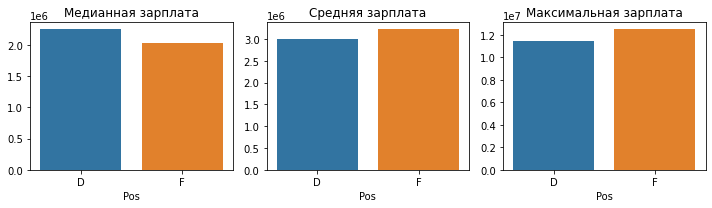

In [ ]:
#сгруппируем зарплаты игроков по позициям
pos_to_caphit = nhl_df.groupby('Pos')['cap_hit'].agg(['mean', 'max', 'median'])

#визуализируем распределение
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].set_title('Медианная зарплата')
sns.barplot(
    x=pos_to_caphit['median'].index, 
    y=pos_to_caphit['median'].values, 
    ax=ax[0], 
    )

ax[1].set_title('Средняя зарплата')
sns.barplot(
    x=pos_to_caphit['mean'].index, 
    y=pos_to_caphit['mean'].values, 
    ax=ax[1], 
    )

ax[2].set_title('Максимальная зарплата')
sns.barplot(
    x=pos_to_caphit['max'].index, 
    y=pos_to_caphit['max'].values, 
    ax=ax[2], 
    )
fig.tight_layout()


Средняя, медианная и даже максимальная зарплаты на первый взгляд выглядят практически одиннаковыми у защитников и нападающих

Проверим гипотезу "Н0 = зарплаты игроков незначительно отличаются, независимо от позиции".

Альтернативная гипотеза "Н1 - зарплаты игроков имеют значительное отличие, зависимо от позиции" 

Проверим тестом "Манна-Уитни", так как имеем ненормальное распределение, количественные данные.



In [ ]:
#возьмем зарплаты защитников и столько же нападающих и проверим гипотезу
defenders = nhl_df[nhl_df['Pos'] == 'D']['cap_hit']
forwards = nhl_df[nhl_df['Pos'] == 'F']['cap_hit']

In [ ]:
from scipy.stats.distributions import alpha
from scipy.stats import mannwhitneyu

alpha=0.05 #назначамый уровень значимости
stat, p_value = mannwhitneyu(sorted(defenders.values), sorted(forwards.values))
print(f" Mann–Whitney U Test: p-value={p_value:.4f}")

if p_value < alpha:
  print('Отвергаем гипотезу Н0, данные имеют значительное отличие')
else:
  print('Оставляем нулевую гипотезу о том, зарплаты игроков незначительно отличаются, вне зависимости от позиции')

 Mann–Whitney U Test: p-value=0.5034
Оставляем нулевую гипотезу о том, зарплаты игроков незначительно отличаются, вне зависимости от позиции


Раз позиция игрока не сильно влияет на зарплату, то логично бы избавиться от признака. Однако, торопиться рано. 

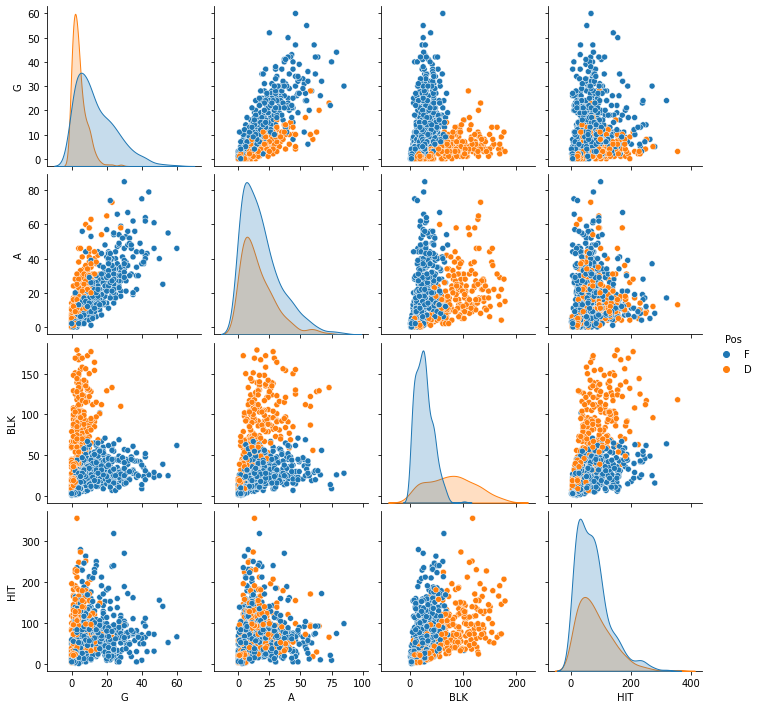

In [ ]:
pair_df = nhl_df[['Pos', 'G', 'A', 'BLK', 'HIT']]
pair_df = pair_df.drop_duplicates(ignore_index=True)

sns.pairplot(pair_df, hue='Pos')

На графиках видно что точки с нападающими и защитниками практически не перемешиваются. Логично же, что нападающие будут чаще забивать, а защитники будут чаще блокировать броски. 

Поэтому оставим признак, преобразовав его в численный

In [ ]:
nhl_df['Pos'] = nhl_df['Pos'].apply(lambda x: 1 if x == "F" else 0)
nhl_df['Pos'].value_counts()

1    469
0    253
Name: Pos, dtype: int64

In [ ]:
#проверим, что категориальных признаков не осталось
print(f'Количество категориальных признаков равно {len(nhl_df.select_dtypes(["object"]).columns)}')

Количество категориальных признаков равно 0


### <center> 4. Количественные признаки

Посмотрим по порядку на все количественные признаки, проанализируем их.

In [ ]:
nhl_df.columns
features = list(nhl_df.columns)
features.remove('Pos')
features.remove('cap_hit')
features

['Age',
 'GP',
 'G',
 'A',
 '+-',
 'PS',
 'S',
 'S%',
 'ATOI',
 'BLK',
 'HIT',
 'FO%',
 'PIM%',
 'PP%',
 'PP.1%',
 'CF',
 'CA',
 'CF%',
 'CF% rel',
 'oiSH%',
 'oiSV%',
 'oZS%',
 'dZS%',
 'TK',
 'GV']

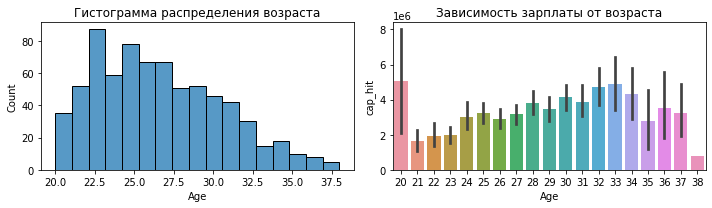

In [ ]:
#визуализируем распределение
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].set_title('Гистограмма распределения возраста')
sns.histplot(
    data = nhl_df,
    x='Age',
    ax=ax[0], 
    )

ax[1].set_title('Зависимость зарплаты от возраста')
sns.barplot(
    data = nhl_df,
    x='Age',
    y='cap_hit',
    ax=ax[1] 
    )

fig.tight_layout()

Возраст практически не влияет на уровень зарплаты, разве что есть снижение средних зарплат у игроков "35+". 

Пройдемся по все остальным признакам и тезисно проанализируем их

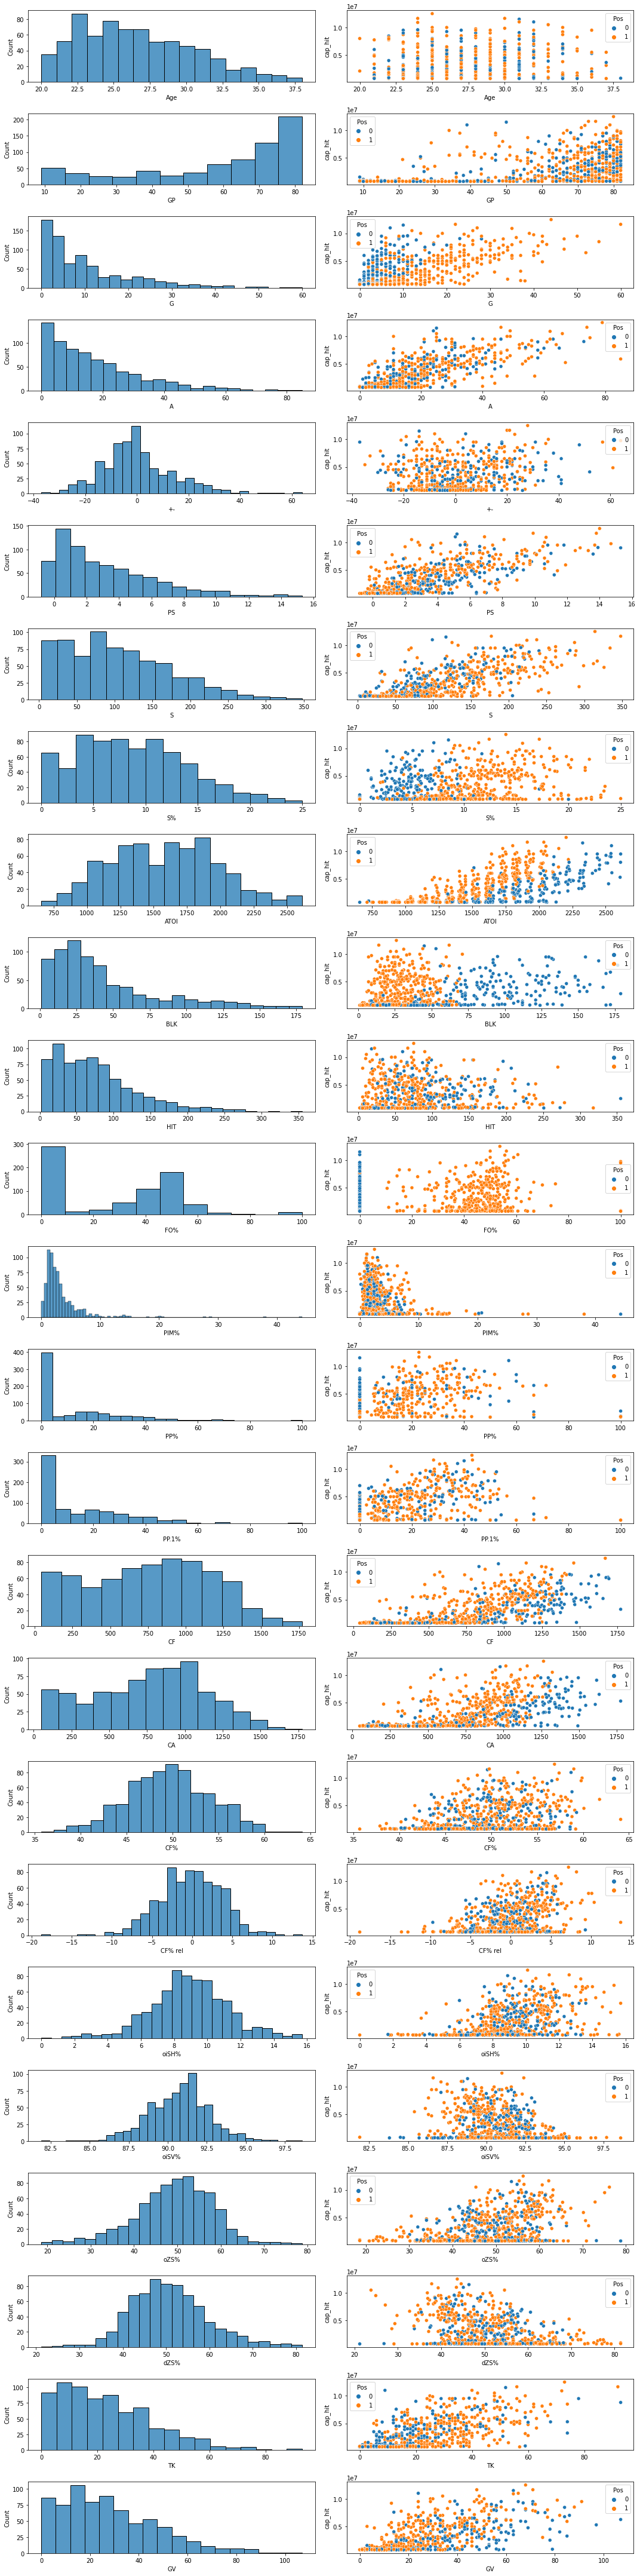

In [ ]:
n = len(features) #число категориальных признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 60)) #фигура+n*2 координатных плоскостей
#Создаем цикл для всех признаков из списка категориальных признаков
for i, feature in enumerate(features):
    #Строим гистограмму распределения признака
    #ax[i][0].set_title(f'Гистограмма распределения признака {feature}')
    sns.histplot(data=nhl_df, x=feature, ax=axes[i][0])
    #Строим график зависимости зарплаты от признака
    #ax[i][1].set_title(f'Зависимость зарплаты от признака {feature}')
    sns.scatterplot(data = nhl_df, x=feature, y='cap_hit', hue='Pos', ax=axes[i][1])

plt.tight_layout() #выравнивание графиков

In [ ]:
#посторим матрицу корреляции
fig = px.imshow(nhl_df.corr(), aspect="auto")
fig.show()

Тезисный анализ признаков:

'Age' - не имеет сильной корреляции с тагргетом, дискретный, преобразуем в ранговый. Склоняюсь к удалению признака.

'GP' - **удаляем**, влияет на таргет незначительно, но вот сильно коррелирует с признаками "СА" и "СF" (не удивительно, так как чем больше у тебя игр, тем больше бросков). 

'G' - оставляем признак, сильная корреляция с признаком "S", надо бы его привести к значению, в среденем за игру.

'A' - оставляем признак, самая сильняя корреляция с таргетом, надо бы его привести к значению, в среденем за игру. 

'+-' - оставляем признак,имеет близкое к нормальному распределение.

'PS' - **удаляем**, сильно коррелирует с признаком "А"

'S' - **удаляем**, сильно коррелирует с признаком "G"

'S%' - оставляем признак (есть желание дать повышенный коэффициент защитникам, а нападающим пониженный)

'ATOI' - оставляем признак,имеет близкое к нормальному распределение.

'BLK' - оставляем признак, надо бы его привести к значению, в среденем за игру. (есть желание дать повышенный коэффициент нападающим, а защитникам пониженный)

'HIT' - **удаляем**, столкновения не влияют на таргет, NHL уже давно не прославляет "силовой хоккей", а данный признак лишь дань прошлому.

'FO%' - **удаляем**, признак распростаняется исключитьльно на нападающих.

'PIM%' - по графику видно сильное смещение влево, сильной корреляции нет, надо масштабировать признак.

'PP%' - много зануленных значений

'PP.1%' - много зануленных значений

'CF' - общий количественный признак, надо бы его привести к значению, в среденем за игру. 

'CA' - **удаляем**, сильно коррелирует с признаком "CF"

'CF%' - **удаляем**, сильно коррелирует с признаком "CF% rel"

'CF% rel', 'oiSH%' и 'oiSH%' - оставляем признаки распределение близко к нормальному, нет сильных корреляций с другими признаками.

'oZS%' - оставляем признаки распределение близко к нормальному, сильно коррелирует с признаком "dZS%"

'dZS%' - **удаляем**, сильно коррелирует с признаком "oZS%"

'TK' и 'GV' - оставляем признаки, но есть желание их преобразовать к значению, в среденем за игру.


In [ ]:
def correct_df(df):
  "Функция произведет все необходимые преобразования"

  #получим новые признаки CF, TK и GV в занчениях средних за игру
  df['CF'] = round(df['CF'] / df['GP'], 2)
  df['TK'] = round(df['TK'] / df['GP'], 2)
  df['GV'] = round(df['GV'] / df['GP'], 2)
  df['BLK'] = round(df['BLK'] / df['GP'], 2)
  df['G_avg'] = round(df['G'] / df['GP'], 2)
  df['A_avg'] = round(df['A'] / df['GP'], 2)

  #с признаками 'S%' (процент удачных бросков) и 'BLK' () сильное влияние дает признак 'Pos' (позиции игрока)
  #применим штраф в величину стандартного отклонения и удалим признак 'Pos'
  df['S%'] = df['S%'] - df['S%'].std()*df['Pos']
  df['BLK'] = df['BLK'] + df['BLK'].std()*df['Pos']

  #удалим признаки
  drop_features = ['Age', 'GP', 'PS', 'S', 'HIT', 'FO%', 'CA', 'CF%', 'dZS%', 'Pos', 'G', 'A']
  df.drop(columns=drop_features, inplace=True)

  return df

In [ ]:
nhl_df = correct_df(nhl_df)

In [ ]:
#посторим матрицу корреляции
fig = px.imshow(nhl_df.corr(), aspect="auto")
fig.show()

In [ ]:
#появилась сильная корреляция между признаками, удалим один из них
nhl_df.drop(columns='ATOI', inplace=True)

In [ ]:
#создадим точку сохранения
nhl_df.to_csv('/content/drive/MyDrive/Project_NHL/data_for_ML.csv', index=False)
#nhl_df = pd.read_csv('/content/drive/MyDrive/Project_NHL/data_for_ML.csv')

На этом разведовательный анализ данный завершенён. 


### <center> 5. Разделение и масштабирование данных

In [ ]:
#разделим наши данные признаки и таргет
X = nhl_df.drop('cap_hit', axis=1)
y = nhl_df['cap_hit']

In [ ]:
#разделим данные на обучающую и валидационную в соотношении 4 к 1
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=24
)

In [ ]:
#масштабируем данные 
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <center> Создание моделей машинного обучения

Перед нами стандартная задача регресии.
Попробуем решить ее при помощи следующих моделей:


1.   Линейная регрессия
1.   Полиномиальная регрессии 2-ой степени
2.   Полиномиальная регрессии 2-ой степени с L2-регуляризацией
2.   Модель случайного леса 
1.   Градиентный бустинг
2.   Новый пункт


Метрикой качества у наших моделей будет минимизация средней абсолютной ошибки (MAE). А также для легкости интерпритации метрики будем высчитывать и процент средней абсолютной ошибки (MAPE)





### Модель линейной регрессии

In [26]:
#задаем модель из библиотеки sklearn
lin_reg = linear_model.LinearRegression()

#обучаем модель на тренировочных данных
lin_reg.fit(X_train_scaled, y_train)

#получаем вектор предсказаний на тренировочных и тестовых данных
y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

#подсчитаем среднюю абсолютную ошибку.
MAE_train = metrics.mean_absolute_error(y_train, y_train_pred)
MAE_test = metrics.mean_absolute_error(y_test, y_test_pred)

#подсчитаем среднюю абсолютную ошибку в процентах.
MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_train_pred)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Train MAE {MAE_train:.2f}')
print(f'Test MAE {MAE_test:.2f}')
print(f'Train MAPE {MAPE_train:.2f}')
print(f'Test MAPE {MAPE_test:.2f}')

Train MAE 1081287.29
Test MAE 1199265.00
Train MAPE 0.61
Test MAPE 0.63


In [25]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

MAE_train = metrics.mean_absolute_error(y_train, y_train_pred)
MAE_test = metrics.mean_absolute_error(y_test, y_test_pred)

MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_train_pred)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Train MAE {MAE_train:.2f}')
print(f'Test MAE {MAE_test:.2f}')
print(f'Train MAPE {MAPE_train:.2f}')
print(f'Test MAPE {MAPE_test:.2f}')

Train MAE 1085067.98
Test MAE 1206928.80
Train MAPE 0.61
Test MAPE 0.63


In [24]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.fit_transform(X_test_scaled)
print(f'Количество признаков стало равным {X_train_scaled_poly.shape[1]}')

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled_poly, y_train)
y_train_pred = lin_reg.predict(X_train_scaled_poly)
y_test_pred = lin_reg.predict(X_test_scaled_poly)

MAE_train = metrics.mean_absolute_error(y_train, y_train_pred)
MAE_test = metrics.mean_absolute_error(y_test, y_test_pred)

MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_train_pred)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Train MAE {MAE_train:.2f}')
print(f'Test MAE {MAE_test:.2f}')
print(f'Train MAPE {MAPE_train:.2f}')
print(f'Test MAPE {MAPE_test:.2f}')

Количество признаков стало равным 135
Train MAE 875384.89
Test MAE 1369365.64
Train MAPE 0.48
Test MAPE 0.72


In [23]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train_scaled_poly, y_train)
y_train_pred = ridge.predict(X_train_scaled_poly)
y_test_pred = ridge.predict(X_test_scaled_poly)

MAE_train = metrics.mean_absolute_error(y_train, y_train_pred)
MAE_test = metrics.mean_absolute_error(y_test, y_test_pred)

MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_train_pred)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Train MAE {MAE_train:.2f}')
print(f'Test MAE {MAE_test:.2f}')
print(f'Train MAPE {MAPE_train:.2f}')
print(f'Test MAPE {MAPE_test:.2f}')

Train MAE 1013566.22
Test MAE 1148701.60
Train MAPE 0.54
Test MAPE 0.55


### Модель случайного леса (RandomForestRegressor)

Для поиска оптимальных гипперпараметров модели воспользуемся программой "Optuna" она быстрая и с хорошей визуализацией

In [17]:
#Установим программу
!pip install optuna

In [18]:
import optuna

#посмотрим на версию
print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 3.1.0


In [35]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 600, 50)
  max_depth = trial.suggest_int('max_depth', 1, 15, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15, 1)

  # создаем модель
  model = ensemble.RandomForestRegressor(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42,
                                          criterion='absolute_error')
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.mean_absolute_error(y_train, model.predict(X_train_scaled))

  return score
  
  

In [36]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо минимизировать метрику direction="minimize"
study = optuna.create_study(study_name="RandomForestRegressor", direction="minimize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-01-25 09:26:21,743] A new study created in memory with name: RandomForestRegressor
[I 2023-01-25 09:26:33,077] Trial 0 finished with value: 667205.2896880416 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 667205.2896880416.
[I 2023-01-25 09:26:41,887] Trial 1 finished with value: 764192.3515000963 and parameters: {'n_estimators': 450, 'max_depth': 12, 'min_samples_leaf': 4}. Best is trial 0 with value: 667205.2896880416.
[I 2023-01-25 09:26:46,024] Trial 2 finished with value: 849368.4124887349 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_leaf': 8}. Best is trial 0 with value: 667205.2896880416.
[I 2023-01-25 09:26:54,816] Trial 3 finished with value: 862554.6242602805 and parameters: {'n_estimators': 550, 'max_depth': 13, 'min_samples_leaf': 9}. Best is trial 0 with value: 667205.2896880416.
[I 2023-01-25 09:27:02,041] Trial 4 finished with value: 711412.6052339688 and parameters: {'n_estimators

CPU times: user 2min 24s, sys: 284 ms, total: 2min 25s
Wall time: 2min 34s


In [37]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 450, 'max_depth': 7, 'min_samples_leaf': 1}
f1_score на обучающем наборе: 635905.26


In [38]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestRegressor(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)

y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

MAE_train = metrics.mean_absolute_error(y_train, y_train_pred)
MAE_test = metrics.mean_absolute_error(y_test, y_test_pred)

MAPE_train = metrics.mean_absolute_percentage_error(y_train, y_train_pred)
MAPE_test = metrics.mean_absolute_percentage_error(y_test, y_test_pred)

print(f'Train MAE {MAE_train:.2f}')
print(f'Test MAE {MAE_test:.2f}')
print(f'Train MAPE {MAPE_train:.2f}')
print(f'Test MAPE {MAPE_test:.2f}')

Train MAE 590874.39
Test MAE 1192843.10
Train MAPE 0.29
Test MAPE 0.57


In [39]:
%%time
# можем прододжить подбор, указав n_trials(любое число, которое добавится к предыдущим итерациям) 
study.optimize(optuna_rf, n_trials=10)

[I 2023-01-25 09:36:48,939] Trial 20 finished with value: 927090.4457842287 and parameters: {'n_estimators': 600, 'max_depth': 4, 'min_samples_leaf': 11}. Best is trial 10 with value: 635905.2591122666.
[I 2023-01-25 09:36:58,813] Trial 21 finished with value: 704065.1630762564 and parameters: {'n_estimators': 500, 'max_depth': 8, 'min_samples_leaf': 2}. Best is trial 10 with value: 635905.2591122666.
[I 2023-01-25 09:37:06,773] Trial 22 finished with value: 724609.4575454938 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 3}. Best is trial 10 with value: 635905.2591122666.
[I 2023-01-25 09:37:18,044] Trial 23 finished with value: 684745.686254766 and parameters: {'n_estimators': 500, 'max_depth': 9, 'min_samples_leaf': 2}. Best is trial 10 with value: 635905.2591122666.
[I 2023-01-25 09:37:32,733] Trial 24 finished with value: 733102.194848835 and parameters: {'n_estimators': 450, 'max_depth': 7, 'min_samples_leaf': 2}. Best is trial 10 with value: 635905.25

CPU times: user 1min 33s, sys: 175 ms, total: 1min 34s
Wall time: 1min 44s


Рассмотрим различные визуализации, доступные через Optuna, которые помогают принимать лучшие решения, видеть влияние различных гиперпараметров на производительность модели.

Сначало необходимо проверить, доступна ли поддержка визуализации: is_available (), т.е. доступны ли правильные версии plotly и matplotlib для создания визуализаций.

In [40]:
optuna.visualization.is_available()

True

График истории оптимизации - отображает количество испытаний на оси Х и метрику на оси Y.

Следует использовать эту диаграмму, чтобы проверить, идет ли оптимизация гиперпараметров в правильном направлении или нет.

In [ ]:
optuna.visualization.plot_optimization_history(study, target_name="f1_score")

В нашем случае, все идет верно, метрика максимизируется.

График важности гиперпараметров - помогает понять, какие гиперпараметры вносят больший вклад в минимизацию/максимизацию метрики.

In [ ]:
optuna.visualization.plot_param_importances(study, target_name="f1_score")

Из этого графика можно сделать вывод, что стоит обратить большее внимание на настройку гиперпараметра min_sampeles_leaf

График контура отношений гиперпараметров

Он показывает связь между различными комбинациями гиперпараметров и значение метрики для этих комбинаций в виде контурного графика.

In [ ]:
optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"],
                                  target_name="f1_score")

Точки с белым фоном это и есть лучшии комбинации n_estimator, max_depth.
















In [ ]:
gb = ensemble.GradientBoostingRegressor(
    learning_rate=0.01,
    n_estimators=200,
    max_depth=10, 
    min_samples_split=20,
    random_state=42,
    verbose=True,
)

gb.fit(X_train_scaled, y_train)
y_train_pred = gb.predict(X_train_scaled)
y_valid_pred = gb.predict(X_test_scaled)

MAE_train = np.sqrt(metrics.mean_absolute_error(y_train, y_train_pred))
MAE_test = np.sqrt(metrics.mean_absolute_error(y_test, y_test_pred))

MAPE_train = np.sqrt(metrics.mean_absolute_percentage_error(y_train, y_train_pred))
MAPE_test = np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_test_pred))

print(f'Train MAE {MAE_train:.2f}')
print(f'Test MAE {MAE_test:.2f}')
print(f'Train MAPE {MAPE_train:.2f}')
print(f'Test MAPE {MAPE_test:.2f}')

      Iter       Train Loss   Remaining Time 
         1 6542517396569.1660            1.89s
         2 6434671065576.0166            1.81s
         3 6326905932977.0547            1.58s
         4 6221870424966.5811            1.43s
         5 6118923081658.3311            1.36s
         6 6017274589833.8457            1.30s
         7 5917952308293.2754            1.27s
         8 5820537364365.5840            1.24s
         9 5724834292485.5332            1.21s
        10 5629855638757.6553            1.22s
        20 4781581572423.1816            1.05s
        30 4072630106076.0308            0.94s
        40 3476421557482.4043            0.89s
        50 2979179362495.8853            0.85s
        60 2563161819070.5933            0.78s
        70 2211347809380.2104            0.74s
        80 1920928203635.8379            0.67s
        90 1677225621703.0586            0.61s
       100 1468487786121.9846            0.55s
       200 438913394544.1744            0.00s
Train MAE 719.4

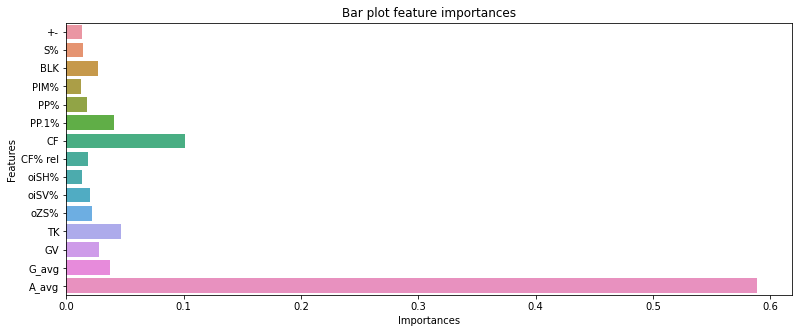

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
feature = X.columns
feature_importances = gb.feature_importances_
sns.barplot(y=feature, x=feature_importances, orient='h', ax=ax);
ax.set_title('Bar plot feature importances')
ax.set_ylabel('Features')
ax.set_xlabel('Importances');

In [ ]:
y_valid_pred[144]

5580870.575281361